In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from scipy.stats import randint
from sklearn.utils.class_weight import compute_sample_weight

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
main_path = 'D:\\Downloads\\'
clusters_v0_df = pd.read_csv(main_path + 'clusters-4-v0.csv')
clusters_v1_df = pd.read_csv(main_path + 'clusters-4-v1.csv')
clusters_v2_df = pd.read_csv(main_path + 'clusters-4-v2.csv')


display(clusters_v0_df)
display(clusters_v1_df)
display(clusters_v2_df)

,x1,x2,y
0,-19.205039,15.905880,1
1,-8.081249,30.322485,1
2,-21.284312,22.407210,1
3,-14.661466,25.668522,1
4,-6.461822,17.406663,1
...,...,...,...
1435,42.626596,-29.882691,4
1436,43.465376,-23.001958,4
1437,46.358862,-29.557741,4
1438,42.809519,-26.078532,4


,x1,x2,y
0,-12.304702,3.499240,1
1,-21.302900,17.983794,1
2,-6.320254,29.639092,1
3,2.259775,26.227155,1
4,-14.777150,19.536615,1
...,...,...,...
1435,50.450656,-11.950103,4
1436,49.692856,-17.175831,4
1437,59.579815,-24.594350,4
1438,31.231241,-24.288964,4


,x1,x2,y
0,2.695298,-11.500760,1
1,-6.302900,2.983794,1
2,8.679746,14.639092,1
3,17.259775,11.227155,1
4,0.222850,4.536615,1
...,...,...,...
1435,65.450656,-11.950103,4
1436,64.692856,-17.175831,4
1437,74.579815,-24.594350,4
1438,46.231241,-24.288964,4


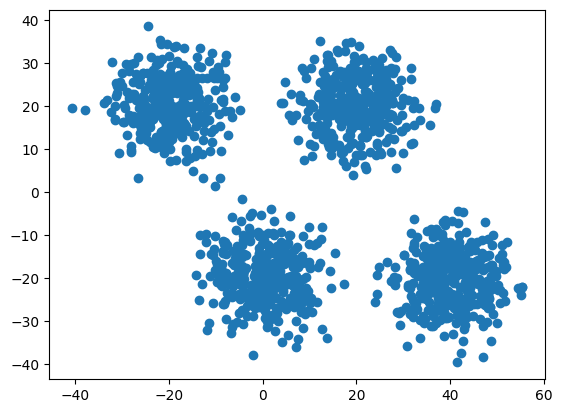

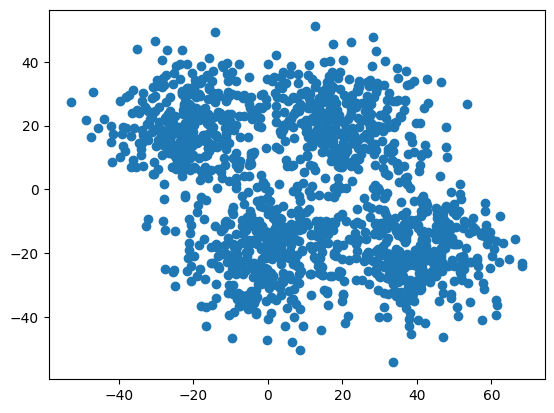

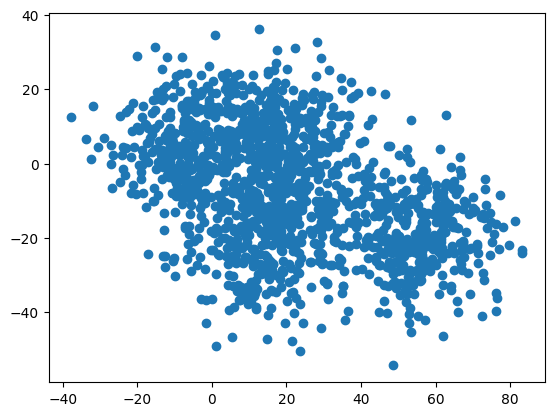

In [4]:
# display(clusters_v0_df)
# display(clusters_v1_df)
# display(clusters_v2_df)

v0_x1 = clusters_v0_df['x1']
v0_x2 = clusters_v0_df['x2']
v0_y  = clusters_v0_df['y']

plt.scatter(v0_x1,v0_x2)
plt.show();

v1_x1 = clusters_v1_df['x1']
v1_x2 = clusters_v1_df['x2']
v1_y  = clusters_v1_df['y']

plt.scatter(v1_x1,v1_x2)
plt.show();

v2_x1 = clusters_v2_df['x1']
v2_x2 = clusters_v2_df['x2']
v2_y  = clusters_v2_df['y']

plt.scatter(v2_x1,v2_x2)
plt.show();


#by looking at the plots i can say that logictic regression would perform great in the first dataframe, a bit lower in second and lowest in the 3rd one as the boundaries would be difficult to predict in them.

In [5]:
# X = clusters_v0_df[['x1', 'x2']].values
# y = clusters_v0_df['y'].values

X = clusters_v1_df[['x1', 'x2']].values
y = clusters_v1_df['y'].values

# X = clusters_v2_df[['x1', 'x2']].values
# y = clusters_v2_df['y'].values

print("shape:", clusters_v0_df.shape)
print("class distribution:\n", clusters_v0_df['y'].value_counts(normalize=True))
print(clusters_v0_df.describe())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

shape: (1440, 3)
class distribution:
 y
1    0.25
2    0.25
3    0.25
4    0.25
Name: proportion, dtype: float64
                x1           x2            y
count  1440.000000  1440.000000  1440.000000
mean     10.100503     0.217573     2.500000
std      23.239573    21.133814     1.118422
min     -40.704233   -39.673196     1.000000
25%      -9.580129   -19.847686     1.750000
50%       9.975014    -0.079558     2.500000
75%      30.001049    20.268484     3.250000
max      55.349930    38.471219     4.000000


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'poly__degree': 1}
Best CV score: 0.9522793148880107
Test accuracy: 0.9513888888888888
Classification report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95        72
           2       0.99      0.93      0.96        72
           3       0.92      0.93      0.92        72
           4       0.97      0.97      0.97        72

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288

Confusion matrix:
 [[70  1  1  0]
 [ 2 67  3  0]
 [ 3  0 67  2]
 [ 0  0  2 70]]
Multiclass ROC-AUC (OvR, macro): 0.9967206790123457


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


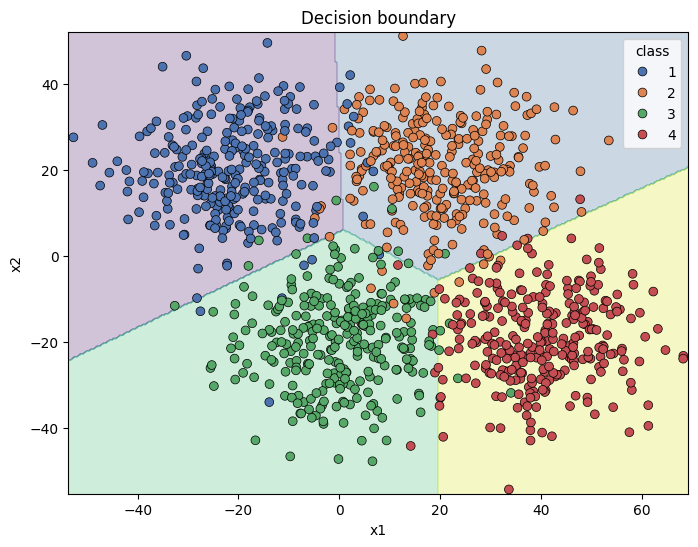

In [28]:
# 4) Pipeline
# We include scaling and optionally PolynomialFeatures. We will toggle polynomial in GridSearch.
pipe = Pipeline([
    ('scaler', StandardScaler()),                # scale features
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),  # degree will be tuned
    ('clf', LogisticRegression(multi_class='multinomial',    # softmax
                               solver='lbfgs',              # 'lbfgs' or 'saga' supports multinomial
                               max_iter=1000,
                               random_state=42
            )
    )
])

# 5) Hyperparameter grid
# - C: inverse of regularization strength (smaller C -> stronger regularization)
# - penalty: 'l2' for lbfgs; if using 'saga' you can try 'l1' too
# - poly__degree: 1 for linear boundary, 2 or 3 for polynomial interactions
param_grid = {
    'poly__degree': [1, 2, 3],          # try linear, quadratic, cubic
    'clf__C': [0.01, 0.1, 1.0, 10.0],   # regularization strength
    'clf__penalty': ['l2'],             # 'l1' only if solver='saga'
    # if you want to try L1, switch solver to 'saga' and add 'l1' here
}

# 6) Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# 7) Fit
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# 8) Evaluate on test
best = grid.best_estimator_
y_pred = best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



# 9) Optional: multiclass ROC-AUC (one-vs-rest)
# sklearn's roc_auc_score supports multi_class='ovr' (one-vs-rest) or 'ovo'
y_proba = best.predict_proba(X_test)
auc = roc_auc_score(pd.get_dummies(y_test), y_proba, average='macro', multi_class='ovr')
print("Multiclass ROC-AUC (OvR, macro):", auc)


# 10) Plot decision boundaries (works because X has 2 features)
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(title='class')
    plt.show()

plot_decision_boundary(best, X_train,y_train)


Fitting SVC(kernel='linear') with GridSearchCV ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params (SVC): {'clf__C': 0.1, 'clf__class_weight': 'balanced'}


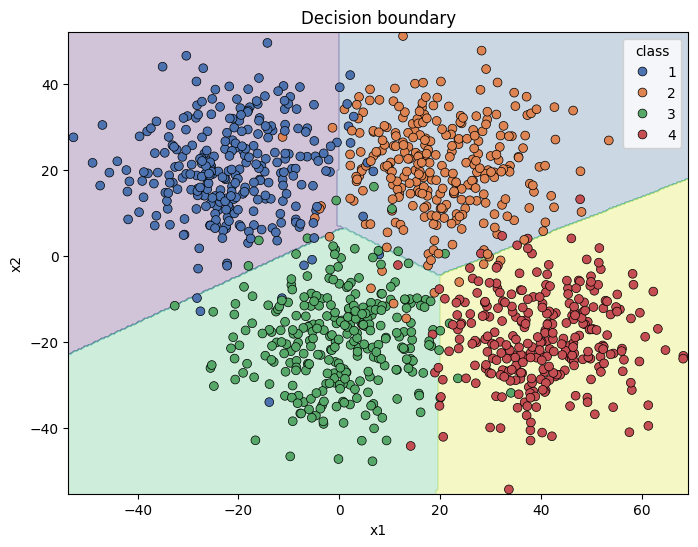

In [35]:
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', probability=True, random_state=42))
])

# Hyperparameter grid for SVC linear
param_grid_svc = {
    'clf__C': [0.01, 0.1, 1.0, 10.0],      # regularization strength
    'clf__class_weight': [None, 'balanced']  # handle class imbalance
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=cv, scoring= 'accuracy',
                        n_jobs=-1, verbose=1)

print("Fitting SVC(kernel='linear') with GridSearchCV ...")
grid_svc.fit(X_train, y_train)
print("Best params (SVC):", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = best_svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(title='class')
    plt.show()

plot_decision_boundary(best_svc, X_train,y_train)

Fitting GridSearchCV (rbf SVC) ...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params (grid): {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__gamma': 1.0}


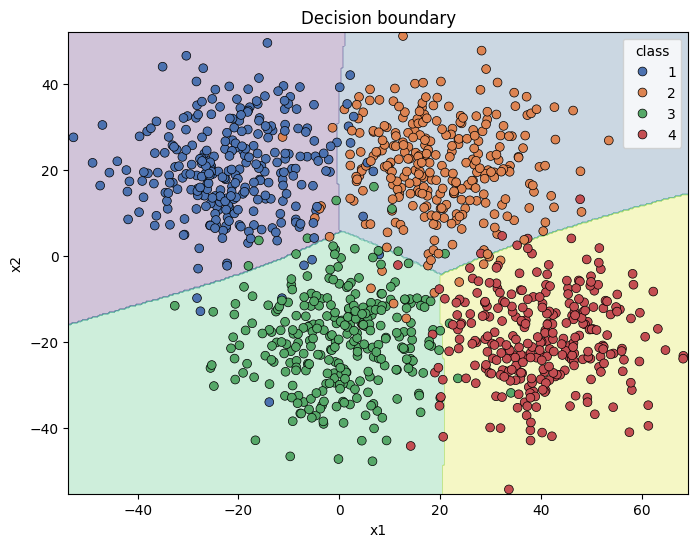

In [38]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

# -----------------------
# Hyperparameter search space
# Notes:
# - C controls regularization (larger => less regularization)
# - gamma controls RBF width (larger gamma => more complex decision boundary)
# - use 'scale' or numeric values; common to search log-uniform ranges
# -----------------------
param_grid = {
    'clf__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'clf__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0],
    'clf__class_weight': [None, 'balanced']
}

# GridSearchCV (exhaustive; slower but thorough)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv,
                    scoring='accuracy',
                    n_jobs=-1, verbose=2)

print("Fitting GridSearchCV (rbf SVC) ...")
grid.fit(X_train, y_train)
print("Best params (grid):", grid.best_params_)
best_svc_grid = grid.best_estimator_


def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = best_svc_grid.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(title='class')
    plt.show()

plot_decision_boundary(best_svc_grid, X_train,y_train)

Running RandomizedSearchCV ...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params (rand): {'clf__bootstrap': True, 'clf__class_weight': 'balanced_subsample', 'clf__max_depth': np.int64(11), 'clf__max_features': np.float64(0.696803266405865), 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5, 'clf__n_estimators': 502}


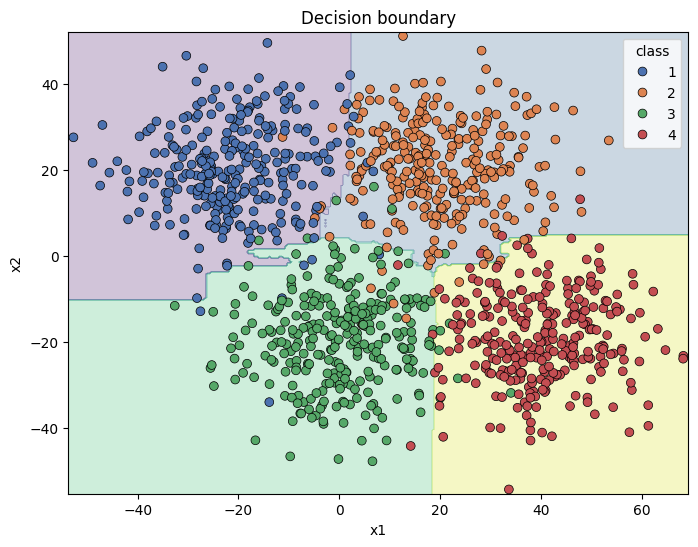

In [45]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight=None, warm_start=False, oob_score=False)

param_dist = {
    'n_estimators': randint(100, 1000),              # trees
    'max_depth': [None] + list(randint(3, 50).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None] + list(uniform(0.1, 0.9).rvs(5)),
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

pipe_rf = Pipeline([('scaler', StandardScaler()), ('clf', rf)])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand = RandomizedSearchCV(pipe_rf, {'clf__' + k: v for k, v in param_dist.items()},
                          n_iter=40, cv=cv, scoring='accuracy',
                          random_state=42, n_jobs=-1, verbose=2)

print("Running RandomizedSearchCV ...")
rand.fit(X_train, y_train)
print("Best params (rand):", rand.best_params_)
best_rf_rand = rand.best_estimator_


def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = best_rf_rand.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.25)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='deep', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(title='class')
    plt.show()

plot_decision_boundary(best_rf_rand, X_train,y_train)


--- Training 5layers_tiny with hidden_layer_sizes=(5, 5, 5, 5, 5) ---
Test accuracy: 0.9479
Confusion matrix:
 [[69  2  1  0]
 [ 2 66  3  1]
 [ 1  1 68  2]
 [ 0  0  2 70]]
Classification report:
               precision    recall  f1-score   support

           1     0.9583    0.9583    0.9583        72
           2     0.9565    0.9167    0.9362        72
           3     0.9189    0.9444    0.9315        72
           4     0.9589    0.9722    0.9655        72

    accuracy                         0.9479       288
   macro avg     0.9482    0.9479    0.9479       288
weighted avg     0.9482    0.9479    0.9479       288



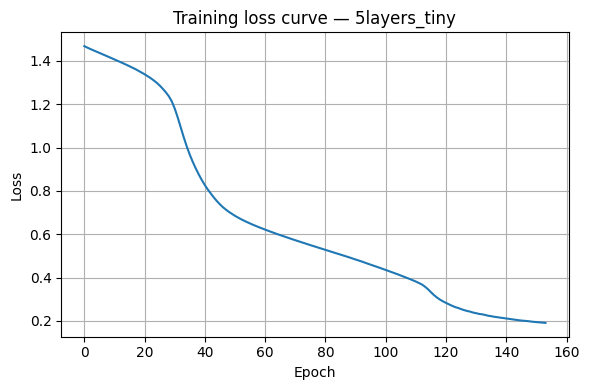


--- Training 5layers_medium with hidden_layer_sizes=(32, 32, 32, 32, 32) ---
Test accuracy: 0.9583
Confusion matrix:
 [[71  1  0  0]
 [ 2 68  2  0]
 [ 3  0 67  2]
 [ 0  0  2 70]]
Classification report:
               precision    recall  f1-score   support

           1     0.9342    0.9861    0.9595        72
           2     0.9855    0.9444    0.9645        72
           3     0.9437    0.9306    0.9371        72
           4     0.9722    0.9722    0.9722        72

    accuracy                         0.9583       288
   macro avg     0.9589    0.9583    0.9583       288
weighted avg     0.9589    0.9583    0.9583       288



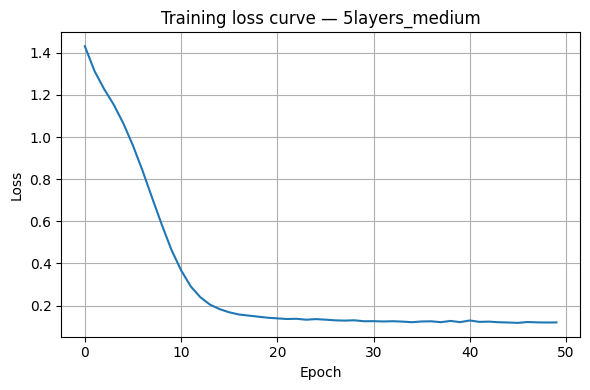


--- Training 5layers_large with hidden_layer_sizes=(128, 128, 64, 64, 32) ---
Test accuracy: 0.9514
Confusion matrix:
 [[69  1  2  0]
 [ 2 68  2  0]
 [ 3  0 67  2]
 [ 0  0  2 70]]
Classification report:
               precision    recall  f1-score   support

           1     0.9324    0.9583    0.9452        72
           2     0.9855    0.9444    0.9645        72
           3     0.9178    0.9306    0.9241        72
           4     0.9722    0.9722    0.9722        72

    accuracy                         0.9514       288
   macro avg     0.9520    0.9514    0.9515       288
weighted avg     0.9520    0.9514    0.9515       288



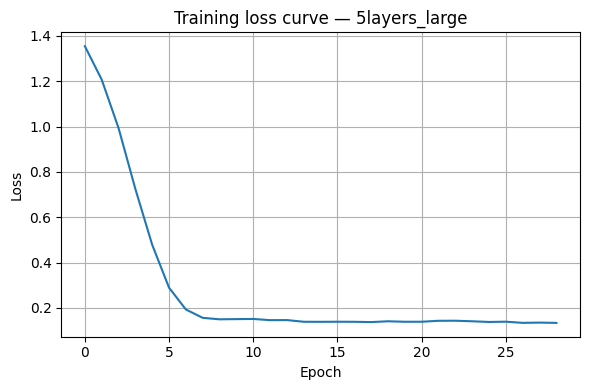

In [8]:
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

# Pipeline with scaler + MLP
def make_pipeline(hidden_sizes, random_state=42):
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_sizes,
        activation='relu',         # good default
        solver='adam',             # good default for most cases
        alpha=1e-4,                # L2 regularization
        batch_size='auto',         # auto => min(200, n_samples)
        learning_rate='adaptive',  # can use 'constant' or 'invscaling'
        learning_rate_init=1e-3,
        max_iter=500,              # early_stopping will usually stop earlier
        early_stopping=True,       # uses a validation split to stop early
        n_iter_no_change=20,
        tol=1e-4,
        verbose=False,
        random_state=random_state
    )
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', mlp)])
    return pipe

# Define three 5-layer architectures (each tuple is 5 layers)
architectures = {
    "5layers_tiny": (5, 5, 5, 5, 5),          # very small network (5 neurons each)
    "5layers_medium": (32, 32, 32, 32, 32),   # medium capacity
    "5layers_large": (128, 128, 64, 64, 32)   # larger and asymmetric
}

results = {}

for name, hidden in architectures.items():
    print(f"\n--- Training {name} with hidden_layer_sizes={hidden} ---")
    pipe = make_pipeline(hidden)
    # pass sample_weight to fit to handle imbalance
    pipe.fit(X_train, y_train, clf__sample_weight=sample_weight)
    # store fitted pipeline
    results[name] = pipe

    # Evaluation
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"Test accuracy: {acc:.4f}")
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))
    print("Classification report:\n", classification_report(y_test, preds, digits=4))

    # Plot training loss curve from the MLPClassifier object
    mlp = pipe.named_steps['clf']
    plt.figure(figsize=(6,4))
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training loss curve — {name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
